In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [164]:
df_dis = pd.read_csv('emdat_public_2023_09_21_query_uid-Mh0Ip8.csv')

df_gdp = pd.read_csv('GDP_growthRate_annual.csv')

df_dis.head()



,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted (000 US$)",Insured Damages (000 US$),"Insured Damages, Adjusted (000 US$)",Total Damages (000 US$),"Total Damages, Adjusted (000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,2000-0372-CHN,2000,372,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,NaN,NaN,NaN,19000.0,32291.0,58.840648,1;2,914,13006;13009;13010,"Jiangxi Sheng (Adm1). Quanzhou, Xiamen, Zhangz..."
1,2000-9186-AFG,2000,9186,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,50.0,85.0,58.840648,1,272;273;274;277;279;281;282;285;287;289;293;29...,NaN,"Badakhshan, Badghis, Baghlan, Farah, Ghazni, H..."
2,2000-0373-BGD,2000,373,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.840648,2,NaN,5770;5772,"Chittagong, Cox's Bazar (Adm2)."
3,2000-0905-BOL,2000,905,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.840648,1,40444;40445;40446;40447;40448;40450,NaN,"Chuquisaca, Cochabamba, La Paz, Oruro, Potosi,..."
4,2000-0019-BRA,2000,19,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.840648,2,NaN,8467;8555;9902;9956;9961;9985;11089;11543,"Barra Mansa, Campos Do Jordao, Pirangucu, Rese..."


In [165]:
df_gdp

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,7.616589,4.195963,-0.957771,1.120879,7.281026,-0.384927,1.138906,3.096722,1.833431,...,6.429817,-0.020479,3.543630,2.116716,5.482371,5.257855,0.635030,-18.589099,17.172509,NaN
1,Africa Eastern and Southern,3.353760,3.627244,3.901576,3.101958,5.507830,6.112155,6.558306,6.577086,4.312489,...,4.219599,3.994682,2.974101,2.224524,2.546973,2.513984,2.087765,-2.888681,4.334927,3.404852
2,Afghanistan,NaN,NaN,NaN,8.832278,1.414118,11.229715,5.357403,13.826320,3.924984,...,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.700000,NaN
3,Africa Western and Central,3.732687,5.205160,9.920821,5.535667,7.999780,5.827779,5.375032,5.527125,6.280311,...,6.109741,5.929463,2.750042,0.125435,2.313219,2.813142,3.212407,-0.927800,3.980848,3.762758
4,Angola,3.054624,4.205999,13.665689,2.990000,10.950000,15.030000,11.550000,14.010000,11.170000,...,4.954613,4.822559,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.340908,3.348804,5.916270,5.571757,4.825690,3.406631,4.756831,-5.340275,10.745612,3.511707
262,"Yemen, Rep.",6.181916,3.803646,3.935232,3.747398,3.972696,5.591748,3.170409,3.338428,3.647569,...,4.823519,-0.188690,-27.994546,-9.375124,-5.071796,0.752448,NaN,NaN,NaN,NaN
263,South Africa,4.200000,2.700000,3.700374,2.949075,4.554560,5.277052,5.603806,5.360474,3.191044,...,2.485468,1.413826,1.321862,0.664552,1.157947,1.522329,0.303453,-6.342471,4.913097,2.042299
264,Zambia,3.897323,5.316868,4.506014,6.944974,7.032395,7.235599,7.903694,8.352436,7.773896,...,5.057232,4.697992,2.920375,3.776679,3.504336,4.034494,1.441306,-2.785055,4.598734,4.744942


In [166]:

print(df_dis.dtypes)
'''
We are predicting for : GDP growth rate

'''

'''
Variables to model on:
1. Year
2. Country
3. Dis Mag Value
4. Total Deaths
5. Total Affected  
6.  Reconstruction Costs (000 US$)              float64
    Reconstruction Costs, Adjusted (000 US$)    float64
    Insured Damages (000 US$)                   float64
    Insured Damages, Adjusted (000 US$)         float64
    Total Damages (000 US$)                     float64
    Total Damages, Adjusted (000 US$)           float64 

'''

Dis No                                       object
Year                                          int64
Seq                                           int64
Glide                                        object
Disaster Group                               object
Disaster Subgroup                            object
Disaster Type                                object
Disaster Subtype                             object
Disaster Subsubtype                          object
Event Name                                   object
Country                                      object
ISO                                          object
Region                                       object
Continent                                    object
Location                                     object
Origin                                       object
Associated Dis                               object
Associated Dis2                              object
OFDA Response                                object
Appeal      

'\nVariables to model on:\n1. Year\n2. Country\n3. Dis Mag Value\n4. Total Deaths\n5. Total Affected  \n6.  Reconstruction Costs (000 US$)              float64\n    Reconstruction Costs, Adjusted (000 US$)    float64\n    Insured Damages (000 US$)                   float64\n    Insured Damages, Adjusted (000 US$)         float64\n    Total Damages (000 US$)                     float64\n    Total Damages, Adjusted (000 US$)           float64 \n\n'

In [167]:
relevant_columns = ['Country', 'Dis Mag Value', 'Total Deaths', 'Total Affected',
                    'Reconstruction Costs (000 US$)', 'Reconstruction Costs, Adjusted (000 US$)',
                    'Insured Damages (000 US$)', 'Insured Damages, Adjusted (000 US$)',
                    'Total Damages (000 US$)', 'Total Damages, Adjusted (000 US$)']

dis_data = df_dis[relevant_columns]
merged_data = pd.merge(dis_data, gdp_per_country, how='left', left_on='Country', right_on='Country Name')

In [168]:
merged_data.head()

,Country,Dis Mag Value,Total Deaths,Total Affected,Reconstruction Costs (000 US$),"Reconstruction Costs, Adjusted (000 US$)",Insured Damages (000 US$),"Insured Damages, Adjusted (000 US$)",Total Damages (000 US$),"Total Damages, Adjusted (000 US$)",Country Name,2015,2016,2017,2018,2019,2020,2021,2022
0,China,76000.0,43.0,31010.0,NaN,NaN,NaN,NaN,19000.0,32291.0,China,7.041329,6.848762,6.947201,6.749774,5.950501,2.238638,8.447478,2.990805
1,Afghanistan,NaN,37.0,2580000.0,NaN,NaN,NaN,NaN,50.0,85.0,Afghanistan,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.700000,NaN
2,Bangladesh,17000.0,11.0,200050.0,NaN,NaN,NaN,NaN,NaN,NaN,Bangladesh,6.552640,7.113478,6.590250,7.319413,7.881907,3.448026,6.938679,7.099829
3,Bolivia (Plurinational State of),NaN,30.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brazil,350000.0,26.0,70000.0,NaN,NaN,NaN,NaN,NaN,NaN,Brazil,-3.545763,-3.275917,1.322869,1.783667,1.220778,-3.276759,4.988850,2.900531


In [169]:
merged_data = merged_data.dropna()
merged_data.head()

,Country,Dis Mag Value,Total Deaths,Total Affected,Reconstruction Costs (000 US$),"Reconstruction Costs, Adjusted (000 US$)",Insured Damages (000 US$),"Insured Damages, Adjusted (000 US$)",Total Damages (000 US$),"Total Damages, Adjusted (000 US$)",Country Name,2015,2016,2017,2018,2019,2020,2021,2022
3503,Brazil,103400.0,151.0,1500015.0,538000.0,731289.0,470000.0,638858.0,750000.0,1019455.0,Brazil,-3.545763,-3.275917,1.322869,1.783667,1.220778,-3.276759,4.988850,2.900531
3505,China,8.0,87476.0,45976596.0,10000000.0,13592729.0,300000.0,407782.0,85000000.0,115538194.0,China,7.041329,6.848762,6.947201,6.749774,5.950501,2.238638,8.447478,2.990805
4351,Chile,9.0,562.0,2671556.0,10839000.0,14547149.0,8000000.0,10736894.0,30000000.0,40263352.0,Chile,2.151942,1.753039,1.357695,3.990029,0.743130,-6.145247,11.737431,2.440403
4504,Haiti,7.0,222570.0,3700000.0,11500000.0,15434285.0,200000.0,268422.0,8000000.0,10736894.0,Haiti,1.400000,1.812468,2.510271,1.667811,-1.723097,-3.305505,-1.798240,-1.681984
4748,Portugal,483.0,43.0,618.0,1440751.0,1933649.0,70000.0,93948.0,1350000.0,1811851.0,Portugal,1.792046,2.019485,3.506345,2.849326,2.682760,-8.300516,5.502757,6.685751


In [170]:
features = ['Dis Mag Value', 'Total Deaths', 'Total Affected',
                    'Reconstruction Costs (000 US$)', 'Reconstruction Costs, Adjusted (000 US$)',
                    'Insured Damages (000 US$)', 'Insured Damages, Adjusted (000 US$)',
                    'Total Damages (000 US$)', 'Total Damages, Adjusted (000 US$)']
gdp_features = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [171]:
X_train = merged_data[features]
Y_train = merged_data[gdp_features]

Y_train.values

array([[-3.54576339e+00, -3.27591691e+00,  1.32286905e+00,
         1.78366676e+00,  1.22077782e+00, -3.27675880e+00,
         4.98884970e+00,  2.90053062e+00],
       [ 7.04132888e+00,  6.84876221e+00,  6.94720079e+00,
         6.74977383e+00,  5.95050075e+00,  2.23863836e+00,
         8.44747829e+00,  2.99080460e+00],
       [ 2.15194250e+00,  1.75303875e+00,  1.35769537e+00,
         3.99002948e+00,  7.43130031e-01, -6.14524686e+00,
         1.17374311e+01,  2.44040340e+00],
       [ 1.40000000e+00,  1.81246808e+00,  2.51027135e+00,
         1.66781095e+00, -1.72309700e+00, -3.30550547e+00,
        -1.79823989e+00, -1.68198398e+00],
       [ 1.79204605e+00,  2.01948540e+00,  3.50634528e+00,
         2.84932593e+00,  2.68275992e+00, -8.30051604e+00,
         5.50275748e+00,  6.68575118e+00],
       [ 9.88726083e-02, -1.22638398e+00,  2.36838653e+00,
         1.28929193e+00,  1.21051028e-02, -7.78760709e+00,
         4.23525124e+00,  2.94766863e+00],
       [ 3.82529310e+00,  5.496459

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [174]:
# make a neural network
model = Sequential()
# layers
model.add(Dense(128, activation='relu', input_dim=9))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='linear'))
#output layer
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [175]:
epochs = 100
model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_train, Y_train))
loss, mse = model.evaluate(X_test, Y_test)


Epoch 1/100
1/1 [==============================] - 1s 769ms/step - loss: 4001972879360.0000 - mse: 4001972879360.0000 - val_loss: 2403976085504.0000 - val_mse: 2403976085504.0000
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 2403976085504.0000 - mse: 2403976085504.0000 - val_loss: 1337609945088.0000 - val_mse: 1337609945088.0000
Epoch 3/100
1/1 [==============================] - 0s 28ms/step - loss: 1337609945088.0000 - mse: 1337609945088.0000 - val_loss: 740931731456.0000 - val_mse: 740931731456.0000
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 740931731456.0000 - mse: 740931731456.0000 - val_loss: 437676900352.0000 - val_mse: 437676900352.0000
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 437676900352.0000 - mse: 437676900352.0000 - val_loss: 306746851328.0000 - val_mse: 306746851328.0000
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 306746851328.0000 - mse: 306746851328.0000 - va

In [176]:
loss, mse = model.evaluate(X_test, Y_test)
print("Mean Squared Error on Test Data:", mse)


1/1 [==============================] - 0s 25ms/step - loss: 5227217944576.0000 - mse: 5227217944576.0000
Mean Squared Error on Test Data: 5227217944576.0


In [177]:
predictions = model.predict(X_test)
predictions


1/1 [==============================] - 0s 54ms/step


array([[-5309394.   ,   -91548.99 , -3762131.2  ,  -123279.74 ,
         -635876.9  ,  4101391.5  ,  1133226.5  , -4767876.5  ],
       [   45089.69 ,    39825.523,    16572.504,    -7397.071,
          -46759.625,   -83731.88 ,   -55996.47 ,    97992.34 ]],
      dtype=float32)

In [206]:
#For year 2010
gdp_2000 = df_gdp[['Country Name', '2020']]
gdp_2000.set_index('Country Name', inplace=True)
gdp_2000

,2020
Country Name,
Aruba,-18.589099
Africa Eastern and Southern,-2.888681
Afghanistan,-2.351101
Africa Western and Central,-0.927800
Angola,-5.638215
...,...
Kosovo,-5.340275
"Yemen, Rep.",NaN
South Africa,-6.342471


In [207]:
# Filter the data for the year 2020
features_2000 = df_dis[df_dis['Year'] == 2020][['Country', 'Dis Mag Value', 'Total Deaths', 'Total Affected', 
                            'Reconstruction Costs (000 US$)', 'Reconstruction Costs, Adjusted (000 US$)',
                            'Insured Damages (000 US$)', 'Insured Damages, Adjusted (000 US$)',
                            'Total Damages (000 US$)', 'Total Damages, Adjusted (000 US$)']]

# Set 'Country' as the index
features_2000.set_index('Country', inplace=True)
features_2000


,Dis Mag Value,Total Deaths,Total Affected,Reconstruction Costs (000 US$),"Reconstruction Costs, Adjusted (000 US$)",Insured Damages (000 US$),"Insured Damages, Adjusted (000 US$)",Total Damages (000 US$),"Total Damages, Adjusted (000 US$)"
Country,,,,,,,,,
Brazil,100.0,12.0,1119.0,NaN,NaN,NaN,NaN,100000.0,113077.0
Switzerland,180.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
Colombia,NaN,23.0,228000.0,NaN,NaN,NaN,NaN,100000.0,113077.0
Brazil,115220.0,61.0,11012.0,NaN,NaN,NaN,NaN,300000.0,339230.0
Australia,NaN,NaN,NaN,NaN,NaN,1000000.0,1130766.0,1500000.0,1696149.0
...,...,...,...,...,...,...,...,...,...
Zambia,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,NaN,NaN,700000.0,NaN,NaN,NaN,NaN,NaN,NaN
Timor-Leste,NaN,3.0,9131.0,NaN,NaN,NaN,NaN,20000.0,22615.0


In [208]:
# Assuming you have a DataFrame named gdp_2000
merged_data_n = pd.merge(features_2000, gdp_2000, left_index=True, right_index=True)
merged_data_n.head()

,Dis Mag Value,Total Deaths,Total Affected,Reconstruction Costs (000 US$),"Reconstruction Costs, Adjusted (000 US$)",Insured Damages (000 US$),"Insured Damages, Adjusted (000 US$)",Total Damages (000 US$),"Total Damages, Adjusted (000 US$)",2020
Country,,,,,,,,,,
Afghanistan,NaN,13.0,7481.0,NaN,NaN,NaN,NaN,NaN,NaN,-2.351101
Afghanistan,NaN,56.0,18031.0,NaN,NaN,NaN,NaN,NaN,NaN,-2.351101
Afghanistan,NaN,4.0,5500.0,NaN,NaN,NaN,NaN,NaN,NaN,-2.351101
Afghanistan,NaN,16.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,-2.351101
Afghanistan,NaN,212.0,20445.0,NaN,NaN,NaN,NaN,NaN,NaN,-2.351101


In [209]:
merged_data_n.dtypes

Dis Mag Value                               float64
Total Deaths                                float64
Total Affected                              float64
Reconstruction Costs (000 US$)              float64
Reconstruction Costs, Adjusted (000 US$)    float64
Insured Damages (000 US$)                   float64
Insured Damages, Adjusted (000 US$)         float64
Total Damages (000 US$)                     float64
Total Damages, Adjusted (000 US$)           float64
2020                                        float64
dtype: object

In [210]:
merged_data_n.rename(columns={'2020': 'gdp_2020'}, inplace=True)
merged_data_n

,Dis Mag Value,Total Deaths,Total Affected,Reconstruction Costs (000 US$),"Reconstruction Costs, Adjusted (000 US$)",Insured Damages (000 US$),"Insured Damages, Adjusted (000 US$)",Total Damages (000 US$),"Total Damages, Adjusted (000 US$)",gdp_2020
Country,,,,,,,,,,
Afghanistan,NaN,13.0,7481.0,NaN,NaN,NaN,NaN,NaN,NaN,-2.351101
Afghanistan,NaN,56.0,18031.0,NaN,NaN,NaN,NaN,NaN,NaN,-2.351101
Afghanistan,NaN,4.0,5500.0,NaN,NaN,NaN,NaN,NaN,NaN,-2.351101
Afghanistan,NaN,16.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,-2.351101
Afghanistan,NaN,212.0,20445.0,NaN,NaN,NaN,NaN,NaN,NaN,-2.351101
...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,84662.0,4.0,70060.0,NaN,NaN,NaN,NaN,NaN,NaN,1.995585
Vanuatu,252.0,3.0,130120.0,NaN,NaN,NaN,NaN,NaN,NaN,-4.992491
Zambia,NaN,3.0,4272.0,NaN,NaN,NaN,NaN,NaN,NaN,-2.785055


In [243]:
X = merged_data_n.drop(columns=['gdp_2020'])
y = merged_data_n['gdp_2020']
print(y.dtypes)

float64


In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Convert y_train to a NumPy array and then reshape it
y_train_array = np.array(y_train).reshape(-1, 1)

# Create an imputer to fill missing values in the target variable with the mean
y_imputer = SimpleImputer(strategy='mean')

# Apply imputer to the target variable
y_train_imputed = y_imputer.fit_transform(y_train_array).ravel()
y_test_imputed = y_imputer.transform(np.array(y_test).reshape(-1, 1)).ravel()

# Create an imputer to fill missing values in the input features with the mean
X_imputer = SimpleImputer(strategy='mean')

# Apply imputer to the input features
X_train_imputed = X_imputer.fit_transform(X_train)
X_test_imputed = X_imputer.transform(X_test)

# Create the pipeline with StandardScaler and KNeighborsRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ('knn', KNeighborsRegressor())  # k-Nearest Neighbors Regressor
])

# Train the model using the imputed input features and target variable
pipeline.fit(X_train_imputed, y_train_imputed)

# Make predictions
predictions = pipeline.predict(X_test_imputed)


Mean Squared Error: 44.485258889302266


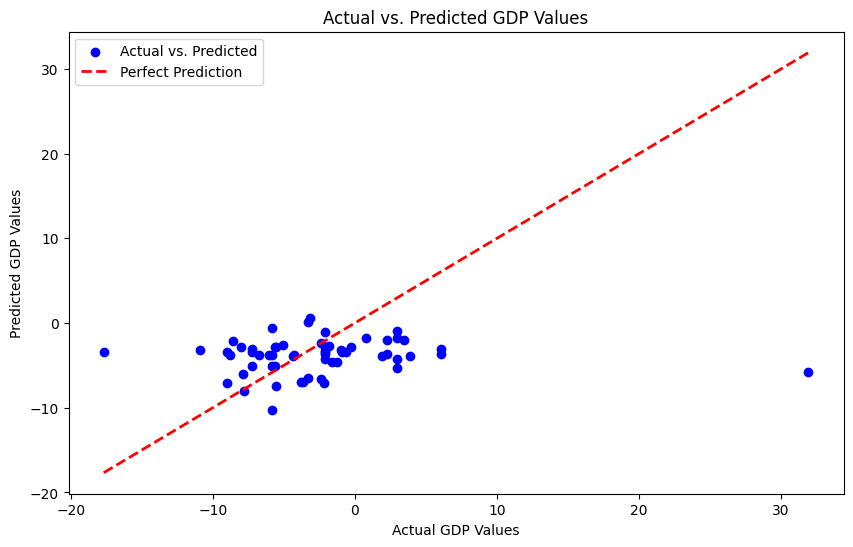

In [251]:
# Plotting actual vs. predicted GDP values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_imputed, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test_imputed), max(y_test_imputed)], [min(y_test_imputed), max(y_test_imputed)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual GDP Values')
plt.ylabel('Predicted GDP Values')
plt.title('Actual vs. Predicted GDP Values')
plt.legend()
plt.show()

In [252]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming df_gdp contains the GDP data for training the neural network
# Extracting features and target variable
X_gdp = df_gdp.drop(columns=['Country Name']).values
y_gdp = df_gdp['2020'].values  # Assuming you want to predict GDP for the year 2000

# Standardize features
scaler = StandardScaler()
X_gdp_scaled = scaler.fit_transform(X_gdp)

# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_gdp_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer with 1 neuron for regression task

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network
model.fit(X_gdp_scaled, y_gdp, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
7/7 [==============================] - 1s 25ms/step - loss: nan - val_loss: nan
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: nan - val_loss: nan
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: nan - val_loss: nan
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 11/100
7/7 [==============================] - 0s 5ms/step - loss: nan - val_loss:

In [269]:
# Assuming X_test_features represents the features you want to use for scaling
features_2020 = features_2000[features_2000['Year'] == 2020]

X_test_features = features_2020.loc[:, features].values


scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_features)

# Standardize X_test using the same scaler used for GDP data
X_test_scaled = scaler.transform(X_test)

# Predict GDP values for X_test using the neural network
gdp_predictions_nn = model.predict(X_test_scaled).flatten()

# Assuming predictions contains predictions from your existing model for X_test
combined_predictions = predictions + gdp_predictions_nn

KeyError: 'Year'